In [2]:
import numpy as np
import networkx as nx

In [3]:
G=nx.Graph()

In [4]:
blue, orange, green = "#1f77b4", "#ff7f0e", "#2ca02c"

In [6]:
G.add_nodes_from([
    (1, {"color": blue}),
    (2, {"color": orange}),
    (3, {"color": blue}),
    (4, {"color": green}),
])

In [7]:
G.add_edges_from([(1, 2), (2, 3), (1, 3), (3, 4)])

In [15]:
A = nx.adjacency_matrix(G)
A.todense()

array([[0, 1, 1, 0],
       [1, 0, 1, 0],
       [1, 1, 0, 1],
       [0, 0, 1, 0]])

In [22]:
nx.get_node_attributes(G, 'color').values()

dict_values(['#1f77b4', '#ff7f0e', '#1f77b4', '#2ca02c'])

Node label matrix:

- **Step 1:** Retrieve the color attribute of each node from the graph `G`.
- **Step 2:** Map each color to its corresponding index using the provided `mapping_dict`.
- **Step 3:** Initialize a zero matrix with rows equal to the number of nodes and columns equal to the number of unique colors.
- **Step 4:** Iterate through each node and update the matrix to create the one-hot encoded representation.
- **Step 5:** Return the completed one-hot encoding matrix.

In [31]:
def build_graph_color_label_representation(G, mapping_dict):
    one_hot_idxs = np.array([mapping_dict[v] for v in nx.get_node_attributes(G, 'color').values()])
    one_hot_encoding = np.zeros((one_hot_idxs.size, len(mapping_dict)))
    one_hot_encoding[np.arange(one_hot_idxs.size), one_hot_idxs] = 1
    return one_hot_encoding

In [32]:
X = build_graph_color_label_representation(G, {green: 0, blue: 1, orange: 2})
X

array([[0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.]])

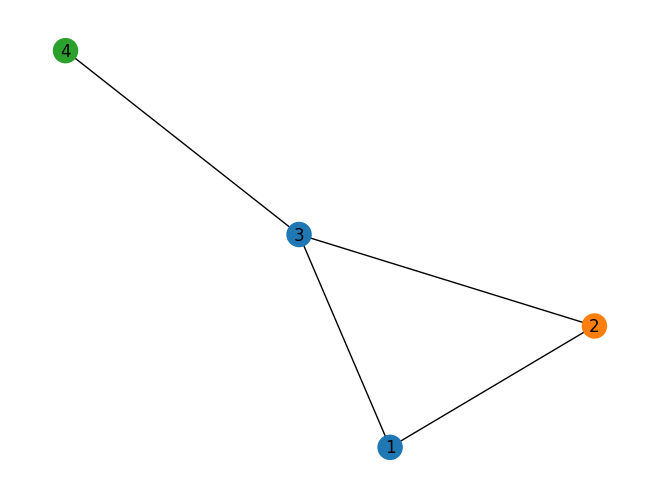

In [21]:
color_map = nx.get_node_attributes(G, 'color').values()
nx.draw(G, with_labels=True, node_color=color_map)

In [40]:
X.shape[1]

3

In [33]:
f_in, f_out = X.shape[1], 6

In [34]:
w_1 = np.random.rand(f_in, f_out)
w_2 = np.random.rand(f_in, f_out)

In [39]:
h = np.dot(X, w_1) + np.dot(np.dot(A.todense(), X), w_2)
h

array([[1.53956224, 2.3829374 , 1.72969158, 0.93519389, 1.28650951,
        1.35460486],
       [2.06959714, 1.95701573, 2.5865311 , 1.16684935, 1.80220906,
        1.64631699],
       [2.17455062, 2.92923693, 2.32505557, 1.81529963, 1.91890463,
        1.79924257],
       [1.38837765, 1.57066178, 1.29652509, 0.87611744, 0.77675555,
        1.03188949]])